## This notebook illusrates various techniques of Image Pre-processing - Binarisation, Thresholding, Rescaling and Noise Removal

### Read an image using the OpenCV function

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
image = cv2.imread('invoice.jpg') # Read the image 

(<AxesSubplot:title={'center':'Input'}>,
 Text(0.5, 1.0, 'Input'))

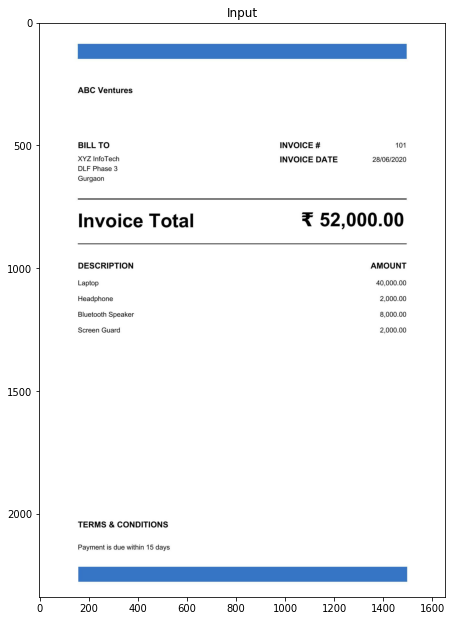

In [3]:
cv2.imshow("invoice.jpg", image)
cv2.waitKey(0) #image will not show until this is called
cv2.destroyWindow('invoice.jpg') #make sure window closes cleanly

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # Converting BGR image read by opencv to RGB for matplot to display

plt.rcParams['figure.figsize'] = (16,16) # Increase size of image
plt.subplot(121),plt.imshow(image),plt.title('Input')

## Binarisation 

(<AxesSubplot:title={'center':'Binarisation'}>,
 Text(0.5, 1.0, 'Binarisation'))

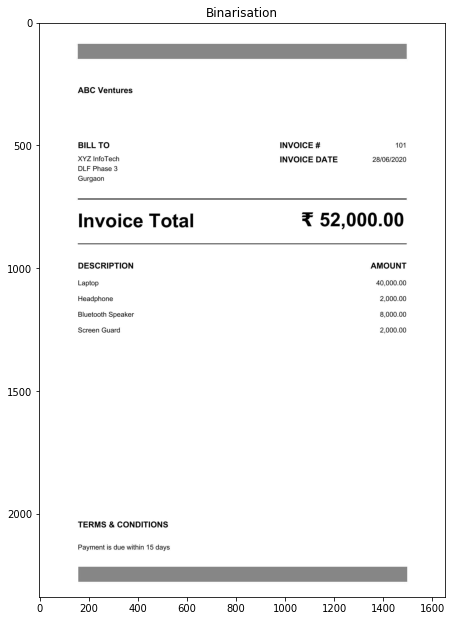

In [4]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


cv2.imshow("invoice.jpg", gray)
cv2.waitKey(0) #image will not show until this is called
cv2.destroyWindow('invoice.jpg') #make sure window closes cleanly

plt.rcParams['figure.figsize'] = (16,16) # Increase size of image
plt.subplot(121),plt.imshow(gray, cmap='gray'),plt.title('Binarisation')

## Simple Thresholding 

### cv2.threshold(source, thresholdValue, maxVal, thresholdingTechnique)

(<AxesSubplot:title={'center':'Simple Threshold'}>,
 Text(0.5, 1.0, 'Simple Threshold'))

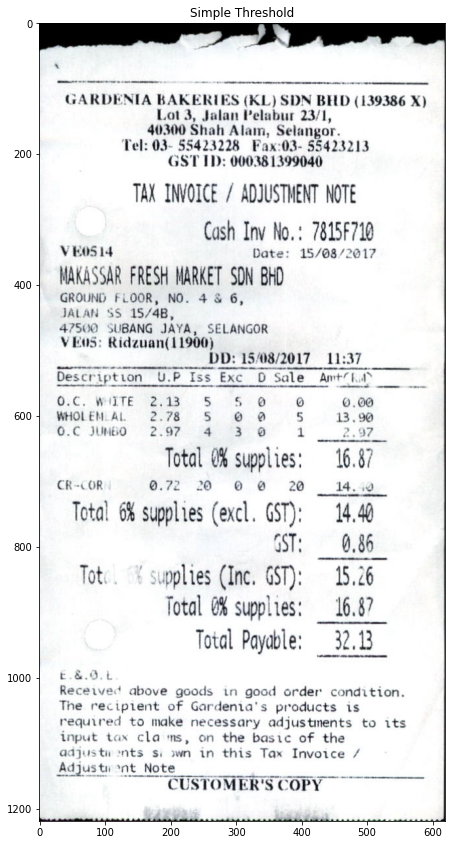

In [8]:
image = cv2.imread('image.jpg') # Read the image 
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

cv2.imshow("image.jpg", image)
cv2.waitKey(0) #image will not show until this is called
cv2.destroyWindow('image.jpg') #make sure window closes cleanly

ret, image2 = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY)

cv2.imshow("image.jpg", image)
cv2.waitKey(0) #image will not show until this is called
cv2.destroyWindow('image.jpg') #make sure window closes cleanly

plt.rcParams['figure.figsize'] = (16,16) # Increase size of image
plt.subplot(121),plt.imshow(image),plt.title('Simple Threshold')

## Adaptive Thresholding 

### cv2.adaptiveThreshold(source, maxVal, adaptiveMethod, thresholdType, blocksize, constant) 

(<AxesSubplot:title={'center':'Adaptive Thresholding'}>,
 Text(0.5, 1.0, 'Adaptive Thresholding'))

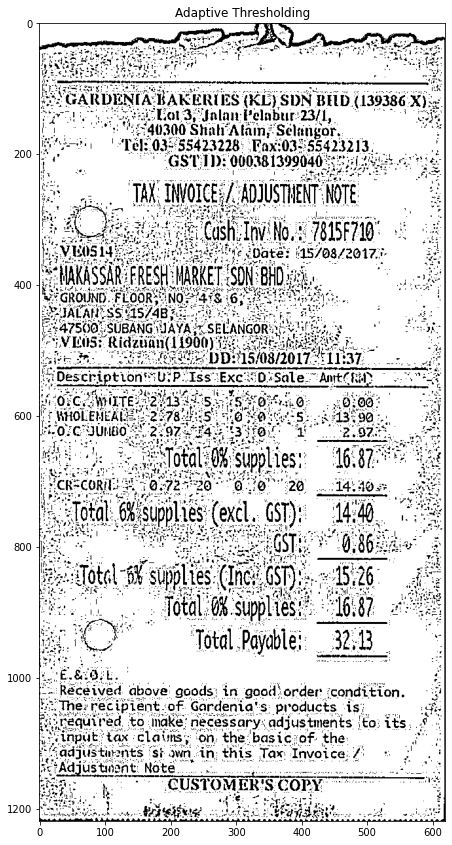

In [9]:
image_th1 = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,11,2)
image_th2 = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)

cv2.imshow("image.jpg", image_th2)
cv2.waitKey(0) #image will not show until this is called
cv2.destroyWindow('image.jpg') #make sure window closes cleanly

plt.rcParams['figure.figsize'] = (16,16) # Increase size of image
plt.subplot(121),plt.imshow(image_th2, cmap='gray'),plt.title('Adaptive Thresholding')

### Otsu's Binarization 

### cv2.threshold(source, thresholdValue, maxVal, thresholdingTechnique)

(<AxesSubplot:title={'center':'Otsu Binarization'}>,
 Text(0.5, 1.0, 'Otsu Binarization'))

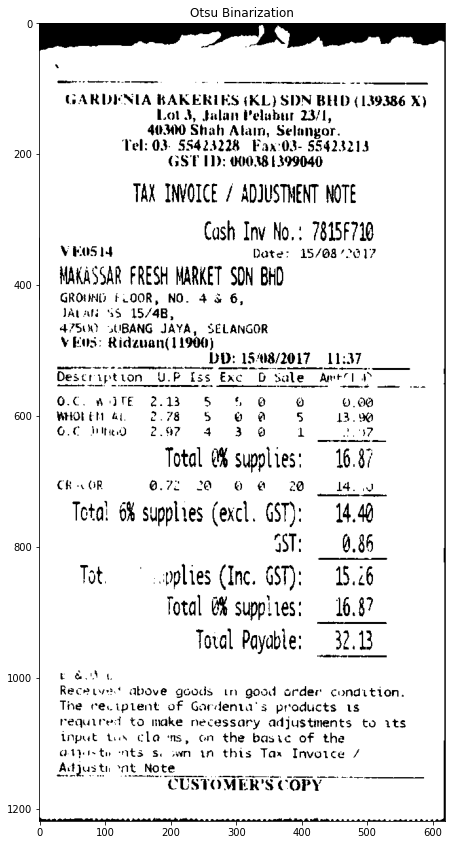

In [10]:
# Otsu's thresholding
ret2,image_th1 = cv2.threshold(gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

cv2.imshow("image.jpg", image_th1)
cv2.waitKey(0) #image will not show until this is called
cv2.destroyWindow('image.jpg') #make sure window closes 

plt.rcParams['figure.figsize'] = (16,16) # Increase size of image
plt.subplot(121),plt.imshow(image_th1, cmap='gray'),plt.title('Otsu Binarization')

### Otsu's Binarization with Gaussian Blurring 

### cv2.threshold(source, thresholdValue, maxVal, thresholdingTechnique)

(<AxesSubplot:title={'center':'Otsu Binarization with Blur'}>,
 Text(0.5, 1.0, 'Otsu Binarization with Blur'))

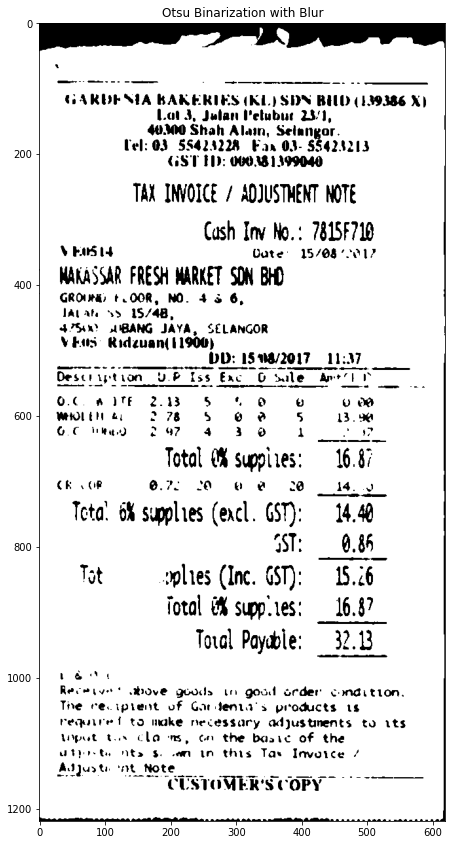

In [11]:
# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(gray,(5,5),0)
ret3,image_th1 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

cv2.imshow("image.jpg", image_th1)
cv2.waitKey(0) #image will not show until this is called
cv2.destroyWindow('image.jpg') #make sure window closes cleanly

plt.rcParams['figure.figsize'] = (16,16) # Increase size of image
plt.subplot(121),plt.imshow(image_th1, cmap='gray'),plt.title('Otsu Binarization with Blur')

### Histogram for calculating right Threshold value

(<AxesSubplot:title={'center':'Histogram'}>,
 Text(0.5, 1.0, 'Histogram'))

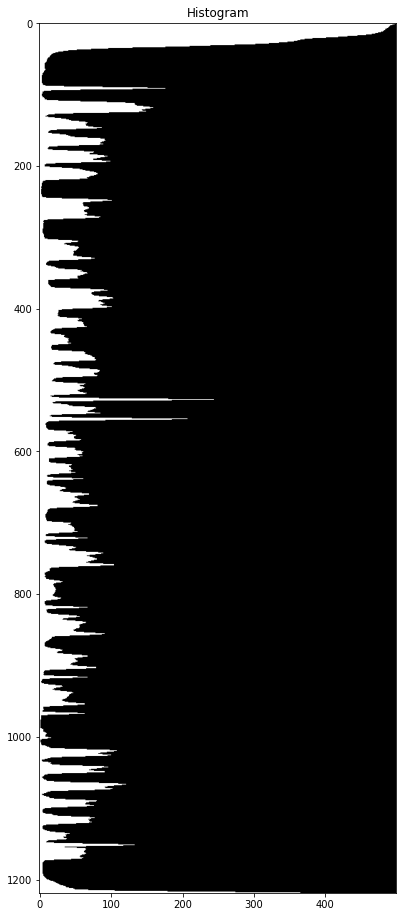

In [12]:
import numpy as np

im = cv2.imread('image.jpg', cv2.IMREAD_GRAYSCALE)

# Invert the image
im = 255 - im

# Calculate horizontal projection
proj = np.sum(im,1)

# Create output image same height as text, 500 px wide
m = np.max(proj)
w = 500
result = np.zeros((proj.shape[0],500))

# Draw a line for each row
for row in range(im.shape[0]):
   cv2.line(result, (0,row), (int(proj[row]*w/m),row), (255,255,255), 1)

plt.rcParams['figure.figsize'] = (16,16) # Increase size of image
plt.subplot(121),plt.imshow(result, cmap='gray'),plt.title('Histogram')

## Rescaling 

### cv2.resize(src, dsize[, dst[, fx[, fy[, interpolation]]]])

(<AxesSubplot:title={'center':'Resized'}>,
 Text(0.5, 1.0, 'Resized'))

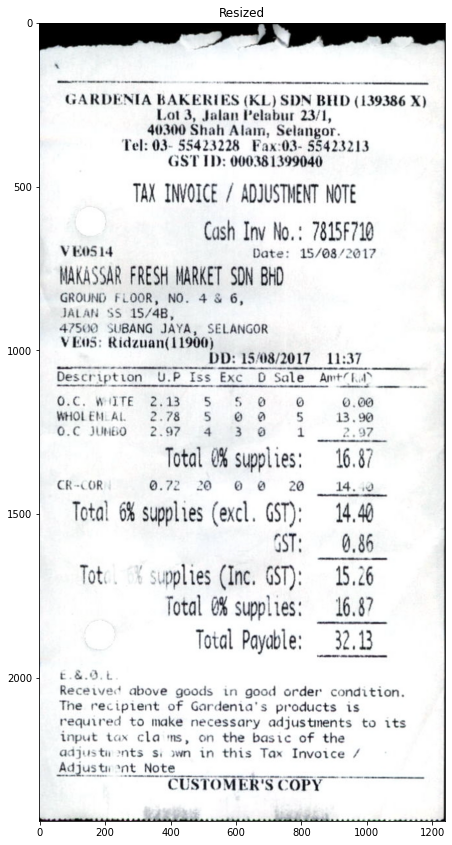

In [13]:
# lets doubled the size of our image/ increasing the size by same factor
image1 = cv2.resize(image, None, fx = 2.0, fy = 2.0 , interpolation = cv2.INTER_CUBIC)
# For fixed size, its not advised as aspected ratio is imapcted 
image2 = cv2.resize(image, (640, 480) )

cv2.imshow("image.jpg", image1)
cv2.waitKey(0) #image will not show until this is called
cv2.destroyWindow('image.jpg') #make sure window closes cleanly

#plt.rcParams['figure.figsize'] = (16,16) # Increase size of image
plt.subplot(121),plt.imshow(image1),plt.title('Resized')

## Noise Removal - Morphology Operations 

### cv2.getStructuringElement(shape, ksize[, anchor])

### cv2.morphologyEx(src, op, kernel[, dst[, anchor[, iterations[, borderType[, borderValue]]]]])

(<AxesSubplot:title={'center':'Morphology'}>,
 Text(0.5, 1.0, 'Morphology'))

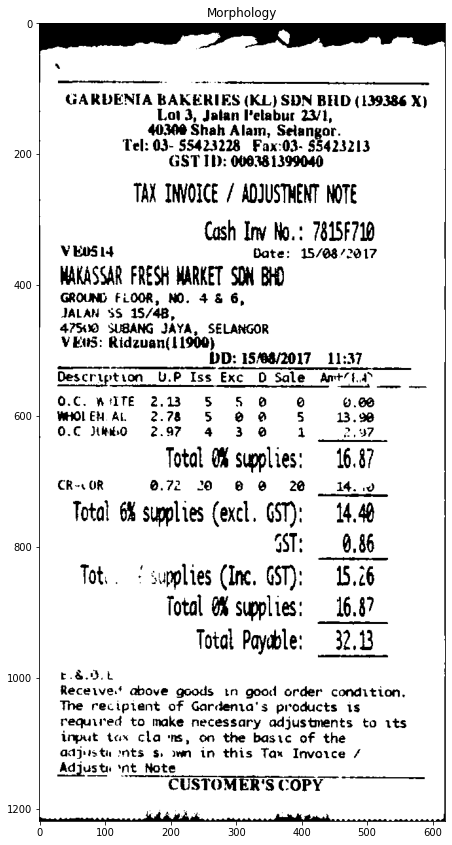

In [14]:
ret, image1 = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY)
# Morph open to remove noise
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2,1))
image2 = cv2.morphologyEx(image1, cv2.MORPH_OPEN, kernel, iterations=1)

cv2.imshow("image.jpg", image2)
cv2.waitKey(0) #image will not show until this is called
cv2.destroyWindow('image.jpg') #make sure window closes cleanly

plt.rcParams['figure.figsize'] = (16,16) # Increase size of image
plt.subplot(121),plt.imshow(image2, cmap='gray'),plt.title('Morphology')

## Noise Removal - Small dots/noises 

(<AxesSubplot:title={'center':'Dots'}>,
 Text(0.5, 1.0, 'Dots'))

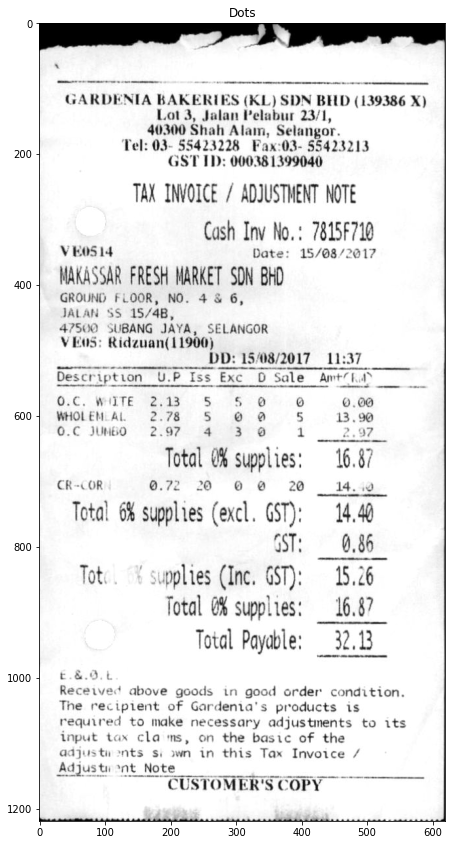

In [15]:

image = cv2.imread('image.jpg') # Read the image 
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

cnts = cv2.findContours(gray, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]  # Selection of one value in case it returns more than one in the form of array

for c in cnts:   
    area = cv2.contourArea(c)
    if area < 3:
        #Removes small noises by filling in the contour
        cv2.drawContours(gray, [c], -1, 0, -1)
                
cv2.imshow("image1.jpg", gray)
cv2.waitKey(0) #image will not show until this is called
cv2.destroyWindow('image1.jpg') #make sure window closes cleanly

plt.rcParams['figure.figsize'] = (16,16) # Increase size of image
plt.subplot(121),plt.imshow(gray, cmap='gray'),plt.title('Dots')

## Noise Removal - Image Blurring 

(<AxesSubplot:title={'center':'Blur'}>,
 Text(0.5, 1.0, 'Blur'))

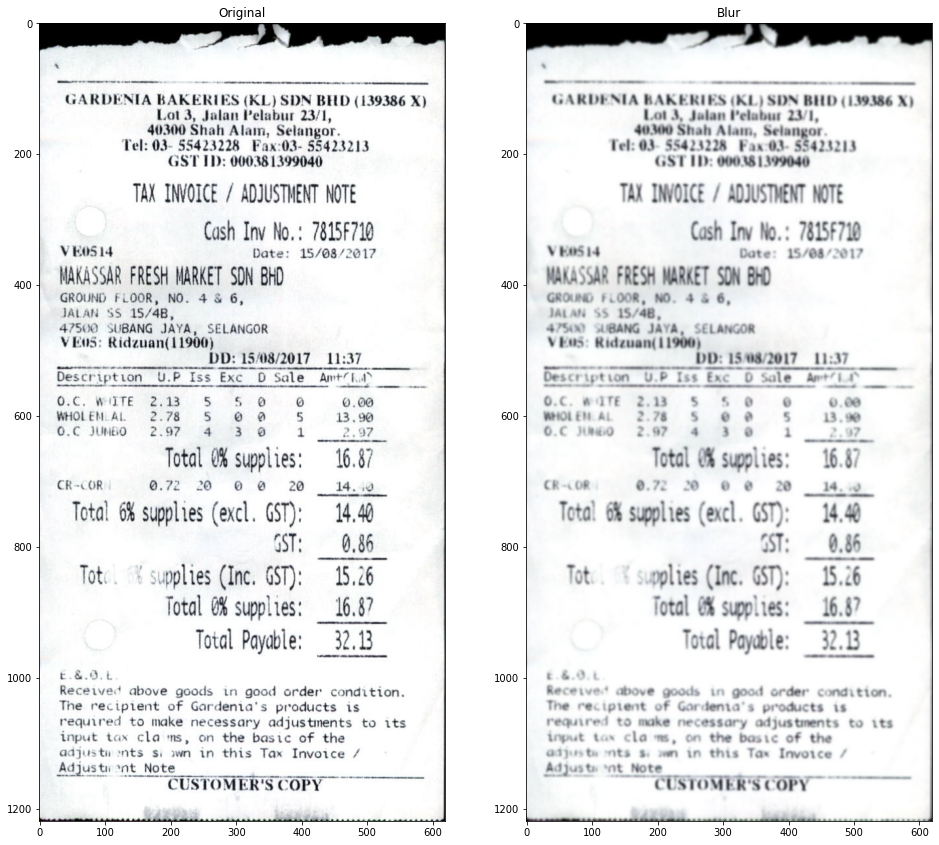

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('image.jpg')

## Apply median blur
image_blur = cv2.GaussianBlur(image, (7,7), 0) 

cv2.imshow("image", image)
cv2.waitKey(0) #image will not show until this is called
cv2.destroyWindow('image') #make sure window closes cleanly

cv2.imshow("image_blur", image_blur)
cv2.waitKey(0) #image will not show until this is called
cv2.destroyWindow('image_blur') #make sure window closes cleanly

plt.rcParams['figure.figsize'] = (16,16) # Increase size of image
plt.subplot(121),plt.imshow(image),plt.title('Original')
plt.subplot(122),plt.imshow(image_blur),plt.title('Blur')

## Noise Removal - Dilation and Erosion 

(<AxesSubplot:title={'center':'Dilation'}>,
 Text(0.5, 1.0, 'Dilation'))

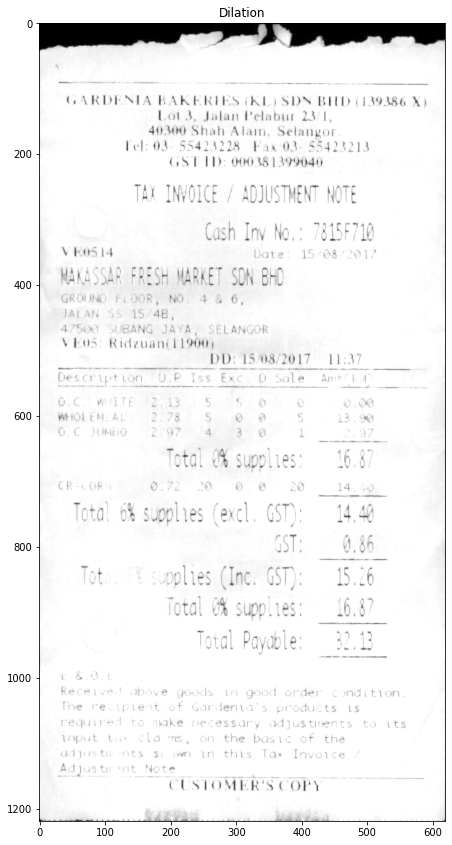

In [17]:
image = cv2.imread('image.jpg') # Read the image 
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

kernel = np.ones((2,2), dtype=np.uint8)
image3 = cv2.dilate(gray,kernel, iterations =2)

cv2.imshow("image.jpg", image3)
cv2.waitKey(0) #image will not show until this is called
cv2.destroyWindow('image.jpg') #make sure window closes cleanly

plt.rcParams['figure.figsize'] = (16,16) # Increase size of image
plt.subplot(121),plt.imshow(image3, cmap='gray'),plt.title('Dilation')

(<AxesSubplot:title={'center':'Erosion'}>,
 Text(0.5, 1.0, 'Erosion'))

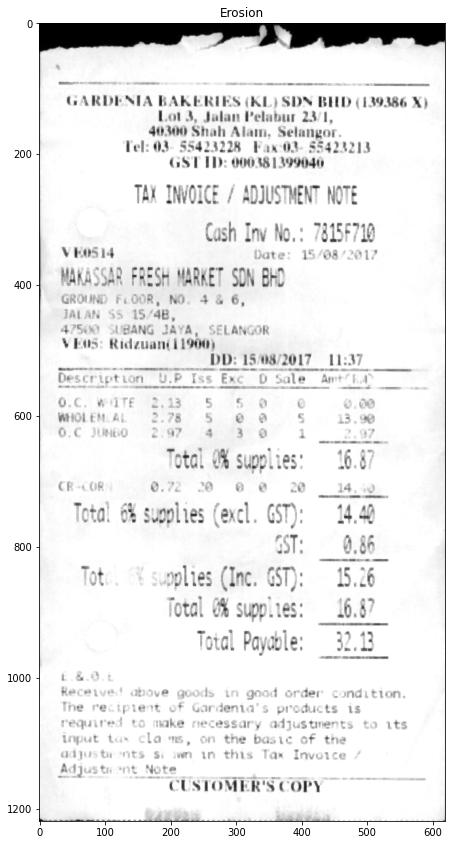

In [18]:
kernel = np.ones((2,2), dtype=np.uint8)
image4 = cv2.erode(image3,kernel, iterations =2)

cv2.imshow("image.jpg", image4)
cv2.waitKey(0) #image will not show until this is called
cv2.destroyWindow('image.jpg') #make sure window closes cleanly

plt.rcParams['figure.figsize'] = (16,16) # Increase size of image
plt.subplot(121),plt.imshow(image4, cmap='gray'),plt.title('Erosion')

## Noise Removal - Deskewing 

angle 15.464093208312988


(<AxesSubplot:title={'center':'deskewed'}>,
 Text(0.5, 1.0, 'deskewed'))

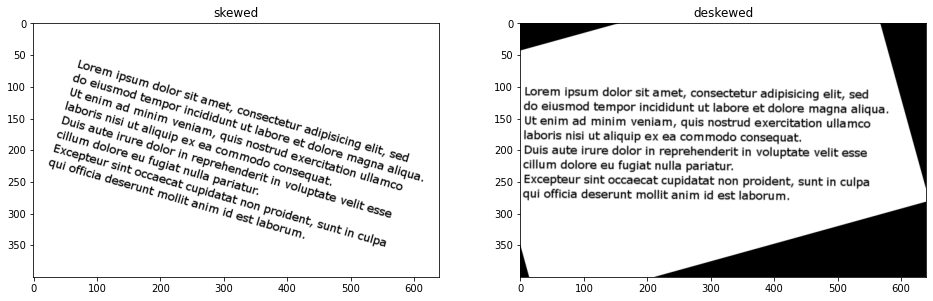

In [19]:
import cv2
import numpy as np

image = cv2.imread('deskew_image.jpg')

cv2.imshow("image.jpg", image)
cv2.waitKey(0) #image will not show until this is called
cv2.destroyWindow('image.jpg') #make sure window closes cleanly

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.bitwise_not(gray)
# threshold the image, setting all foreground pixels to
# 255 and all background pixels to 0
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
# grab the (x, y) coordinates of all pixel values that
# are greater than zero, then use these coordinates to
# compute a rotated bounding box that contains all
# coordinates
coords = np.column_stack(np.where(thresh > 0))
angle = cv2.minAreaRect(coords)[-1]
# the `cv2.minAreaRect` function returns values in the
# range [-90, 0); as the rectangle rotates clockwise the
# returned angle trends to 0 -- in this special case we
# need to add 90 degrees to the angle
if angle < -45:
   angle = -(90 + angle)
# otherwise, just take the inverse of the angle to make
# it positive
else:
   angle = -angle

print("angle", angle)

shape = ( image.shape[1], image.shape[0] ) # cv2.warpAffine expects shape in (length, height)
height = image.shape[0]
width = image.shape[1]
center=(height/2, width/2)
matrix = cv2.getRotationMatrix2D( center=center, angle=angle, scale=1 )
image1 = cv2.warpAffine( src=image, M=matrix, dsize=shape )
cv2.imwrite('deskew_image_out.jpg', image1)

cv2.imshow("image.jpg", image1)
cv2.waitKey(0) #image will not show until this is called
cv2.destroyWindow('image.jpg') #make sure window closes cleanly

plt.rcParams['figure.figsize'] = (16,16) # Increase size of image
plt.subplot(121),plt.imshow(image),plt.title('skewed')
plt.subplot(122),plt.imshow(image1),plt.title('deskewed')

## Noise Removal - Orientation/Rotation 

[OSD] Page number: 0
Orientation in degrees: 90
Rotate: 270
Orientation confidence: 4.36
Script: Latin
Script confidence: 1.97

[ANGLE] 90.0


(<AxesSubplot:title={'center':'rotated'}>,
 Text(0.5, 1.0, 'rotated'))

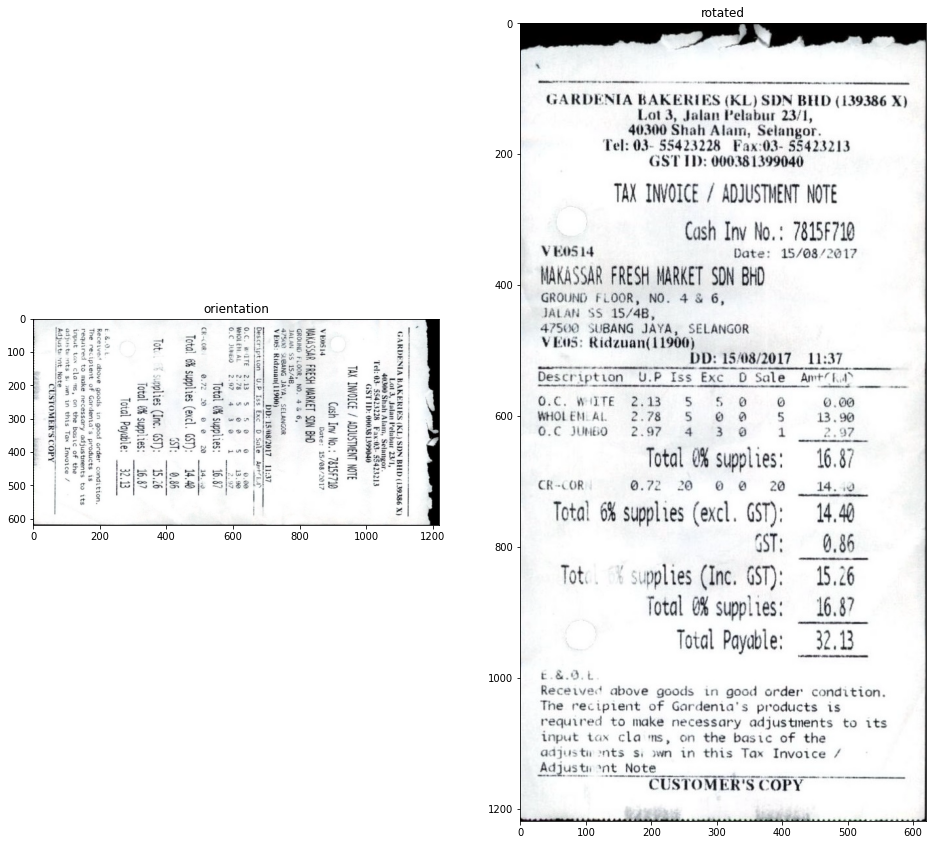

In [20]:
import pytesseract
import cv2
import re

img = cv2.imread("orientation.jpg")

cv2.imshow("image.jpg", img)
cv2.waitKey(0) #image will not show until this is called
cv2.destroyWindow('image.jpg') #make sure window closes cleanly

rot_data = pytesseract.image_to_osd(img);
print("[OSD] "+rot_data)
rot = re.search('(?<=Rotate: )\d+', rot_data).group(0)

angle = float(rot)
if angle > 0:
    angle = 360 - angle
print("[ANGLE] "+str(angle))

if (str(int(angle)) == '0'):
    rotated = img
    
elif (str(int(angle)) == '90'):
    rotated = cv2.rotate(img,cv2.ROTATE_90_COUNTERCLOCKWISE)
    
elif (str(int(angle)) == '180'):
    rotated = cv2.rotate(img,cv2.ROTATE_180)
    
elif (str(int(angle)) == '270'):
    rotated = cv2.rotate(img,cv2.ROTATE_90_CLOCKWISE)

cv2.imwrite("orientation_out.jpg",rotated)

cv2.imshow("image.jpg", rotated)
cv2.waitKey(0) #image will not show until this is called
cv2.destroyWindow('image.jpg') #make sure window closes cleanly

plt.rcParams['figure.figsize'] = (16,16) # Increase size of image
plt.subplot(121),plt.imshow(img),plt.title('orientation')
plt.subplot(122),plt.imshow(rotated),plt.title('rotated')

## Noise Removal - Perspective Transformation 

(<AxesSubplot:title={'center':'output'}>,
 Text(0.5, 1.0, 'output'))

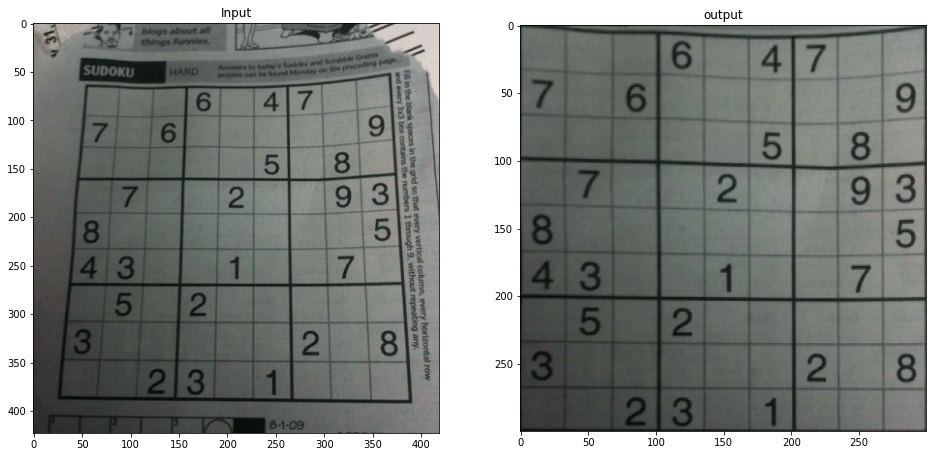

In [21]:
img = cv2.imread('sudoku-original.jpg')
cv2.imshow("image.jpg", img)
cv2.waitKey(0) #image will not show until this is called
cv2.destroyWindow('image.jpg') #make sure window closes cleanly

rows,cols,ch = img.shape

pts1 = np.float32([[56,65],[368,52],[28,387],[389,390]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])

M = cv2.getPerspectiveTransform(pts1,pts2)

dst = cv2.warpPerspective(img,M,(300,300))

cv2.imshow("image.jpg", dst)
cv2.waitKey(0) #image will not show until this is called
cv2.destroyWindow('image.jpg') #make sure window closes cleanly

plt.rcParams['figure.figsize'] = (16,16) # Increase size of image
plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('output')

## Noise Removal - Border Removal

(<AxesSubplot:title={'center':'Without Borders'}>,
 Text(0.5, 1.0, 'Without Borders'))

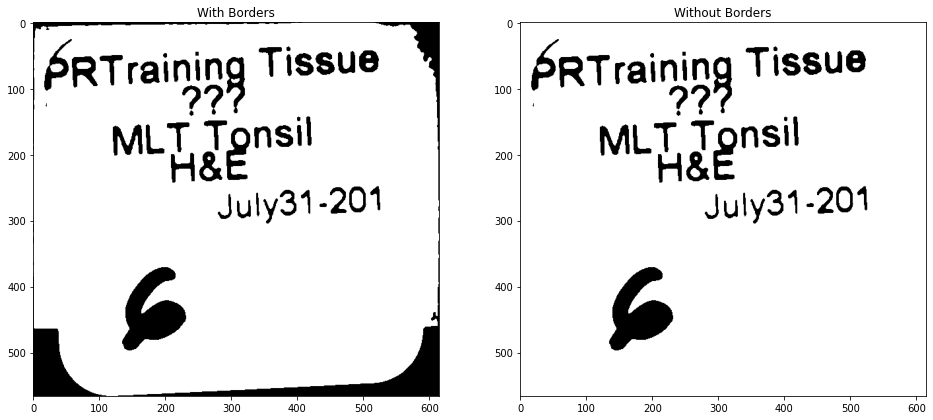

In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('borders.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
mask = np.zeros(image.shape, dtype=np.uint8)


cv2.imshow('Original Image', gray)
cv2.waitKey(0)
cv2.destroyWindow('Original Image') #make sure window closes cleanly

cv2.imshow('Original Image mask', mask)
cv2.waitKey(0)
cv2.destroyWindow('Original Image mask') #make sure window closes cleanly

# Draw contours onto a mask
cnts = cv2.findContours(gray, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]

# The cv2.fillPoly() function can be used to fill in any shape
cv2.fillPoly(mask, cnts, [255,255,255])

cv2.imshow('FillPoly mask', mask)
cv2.waitKey(0)
cv2.destroyWindow('FillPoly mask') #make sure window closes cleanly

#Invert mask
mask = 255 - mask

cv2.imshow('Inverted Mask', mask)
cv2.waitKey(0)
cv2.destroyWindow('Inverted Mask') #make sure window closes cleanly

#Bitwise-or with original image, in this we merge both mask and original image by applying OR operation
result = cv2.bitwise_or(image, mask)

cv2.imshow('Again original Image', gray)
cv2.waitKey(0)
cv2.destroyWindow('Again original Image') #make sure window closes cleanly

cv2.imshow('Bitwise-or with original Image & mask without borders', result)
cv2.waitKey(0)
cv2.destroyWindow('Bitwise-or with original Image & mask without borders') #make sure window closes cleanly

plt.rcParams['figure.figsize'] = (16,16) # Increase size of image
plt.subplot(121),plt.imshow(image),plt.title('With Borders')
plt.subplot(122),plt.imshow(result),plt.title('Without Borders')

## Noise Removal - Making Borders or Padding

(<AxesSubplot:title={'center':'With Borders'}>,
 Text(0.5, 1.0, 'With Borders'))

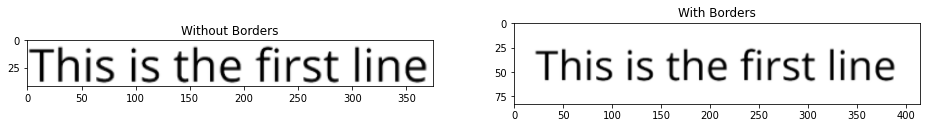

In [24]:
import numpy as np
import cv2

img = cv2.imread('adding_borders.png')
border= cv2.copyMakeBorder(img,20,20,20,20,cv2.BORDER_CONSTANT,value=[255,255,255])

cv2.imshow('image', img)
cv2.imshow('border', border)
cv2.waitKey(0)
cv2.destroyAllWindows()

plt.rcParams['figure.figsize'] = (16,16) # Increase size of image
plt.subplot(121),plt.imshow(img),plt.title('Without Borders')
plt.subplot(122),plt.imshow(border),plt.title('With Borders')

## Combining All Techniques

In [25]:
import cv2
import re
import numpy as np
import pytesseract
import matplotlib.pyplot as plt

image = cv2.imread('orientation.jpg') # Read the image 

cv2.imshow("image.jpg", image)
cv2.waitKey(0) #image will not show until this is called
cv2.destroyWindow('image.jpg') #make sure window closes cleanly

# Binarisation
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


cv2.imshow("gray", gray)
cv2.waitKey(0) #image will not show until this is called
cv2.destroyWindow('gray') #make sure window closes cleanly

# Thresholding 
ret, image2 = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY)

cv2.imshow("threshold", image2)
cv2.waitKey(0) #image will not show until this is called
cv2.destroyWindow('threshold') #make sure window closes cleanly


## Fix Orientation 
rot_data = pytesseract.image_to_osd(image2);
print("[OSD] "+rot_data)
rot = re.search('(?<=Rotate: )\d+', rot_data).group(0)

angle = float(rot)
if angle > 0:
    angle = 360 - angle
print("[ANGLE] "+str(angle))

if (str(int(angle)) == '0'):
    rotated = image2
    
elif (str(int(angle)) == '90'):
    rotated = cv2.rotate(image2,cv2.ROTATE_90_COUNTERCLOCKWISE)
    
elif (str(int(angle)) == '180'):
    rotated = cv2.rotate(image2,cv2.ROTATE_180)
    
elif (str(int(angle)) == '270'):
    rotated = cv2.rotate(image2,cv2.ROTATE_90_CLOCKWISE)

cv2.imshow("rotated", rotated)
cv2.waitKey(0) #image will not show until this is called
cv2.destroyWindow('rotated') #make sure window closes cleanly

## Apply median blur
image_blur = cv2.GaussianBlur(rotated, (3,3), cv2.BORDER_DEFAULT) 

cv2.imshow("image_blur", image_blur)
cv2.waitKey(0) #image will not show until this is called
cv2.destroyWindow('image_blur') #make sure window closes cleanly

# lets increase the size of our image/ increasing the size by 0.5 times
image1 = cv2.resize(image_blur, None, fx = 2.0, fy = 2.0 , interpolation = cv2.INTER_CUBIC)

cv2.imshow("resized", image1)
cv2.waitKey(0) #image will not show until this is called
cv2.destroyWindow('resized') #make sure window closes cleanly

kernel = np.ones((2,2), dtype=np.uint8)
image3 = cv2.dilate(image1,kernel, iterations =2)

cv2.imshow("dilated", image3)
cv2.waitKey(0) #image will not show until this is called
cv2.destroyWindow('dilated') #make sure window closes cleanly

kernel = np.ones((2,2), dtype=np.uint8)
image4 = cv2.erode(image3,kernel, iterations =2)

cv2.imshow("eroded", image4)
cv2.waitKey(0) #image will not show until this is called
cv2.destroyWindow('eroded') #make sure window closes cleanly

text = pytesseract.image_to_string(image4, lang='eng')
print(text)

[OSD] Page number: 0
Orientation in degrees: 90
Rotate: 270
Orientation confidence: 1.70
Script: Latin
Script confidence: 2.11

[ANGLE] 90.0
GARDENIA BAKERIES (KL) SDN BILD (139386 X)
Lat 3, Jalan ’elabur 23/1,
40300 Shah Alain, Selangor
Tel: 03- 55423228 Fax: oroat s 423213
GST ID: 0003813

TAX INVOICE / ADJUSTMENT NOTE
Cash Inv No.: 7815F710

VEoSI4 Date: 15/08/2017

NAKASSAR FRESH MARKET SON BH

GROUND FLOOR, NO. 4 & 6,
JALAN SS 15/48,
475000 SUBANG JAYA, SELANGOR
VES: Ridzuan( 11900)
DD: 18/08/2017 11:37

Description U.P Iss Exc D Sale Art? t S

0O.C. WITE 2.13 5 5S @ e 6.08
WHOLEM Al 62.78 5S 6 @ 5 13.98

0.C Jtimbo 2.97 4 3 @ i 2,97
Total @& supplies: 16.87
CR-. OR ®.72 20 8 8 2 14. wo

Total 6% supplies (excl. GST): 14.48
ST: (0,86

Tot. ° supplies (Inc. GST): 15.26
Total @% supplies: 16.8?

Total Payable: 32.8

r 6.9.b |
Receive: above goods in good order condition.

The recipient of Gardenia'’s products 1s

required to make necessary adjustments to its
input tax cla ‘ns, on th